# Tugas 1 Kelompok (Kelompok 10)
anggota:
- Muhammad Habil Aswad (2208107010013)
- Rafli Afriza Nugraha (2208107010028)
- Muhammad Khalid Al Ghifati (2208107010044)
- Muhammad Ridho (2208107010064)
- Muhammad Ilzam (2208107010087)

## 1. Data Description

Nama dataset yang digunakan: **Earthquakes in Indonesia**  
Sumber dataset: https://www.kaggle.com/datasets/kekavigi/earthquakes-in-indonesia/data

### Deskripsi Dataset (`katalog_gempa.csv`)  
Dataset ini merupakan kumpulan data gempa bumi yang diambil dari *Earthquake Repository* yang dikelola oleh **BMKG** (*Badan Meteorologi, Klimatologi, dan Geofisika*) Indonesia. Dataset ini mencatat kejadian gempa bumi dari **1 November 2008 hingga 26 Januari 2023** dengan beberapa variabel utama sebagai berikut:

| Variabel  | Deskripsi |
|-----------|-----------|
| `tgl` | Tanggal kejadian gempa. |
| `ot` | Waktu kejadian gempa (*timestamp*). |
| `lat` | Latitude episenter gempa (°), berkisar antara **6° LU hingga 11° LS**. |
| `lon` | Longitude episenter gempa (°), berkisar antara **142° BT hingga 94° BT**. |
| `depth` | Kedalaman gempa (km). |
| `mag` | Magnitudo gempa, berkisar antara **1 hingga 9,5**. |
| `remark` | Wilayah gempa menurut klasifikasi **Flinn-Engdahl**. |
| `dip1, strike1, rake1, dip2, strike2, rake2` | Jika mekanisme fokus gempa diukur, nilai-nilai ini tidak kosong. |

### Jumlah data

Data&nbsp;&nbsp;&nbsp;&nbsp;: 92887  
Fitur&nbsp;&nbsp;&nbsp;&nbsp;: 13  
Label&nbsp;&nbsp;&nbsp;: 0  

### Format data
Format data yang digunakan adalah ***Comma Separated Values*** atau **CSV** dengan delimeter koma (',').

## 2. Data Loading

### Cara memuat dataset ke dalam Python
Dalam pemrograman Python, memuat data dapat dilakukan dengan menggunakan library seperti Pandas, NumPy, atau built-in Python tergantung pada format data. Jika data berbentuk CSV, Excel, atau JSON, kita bisa menggunakan Pandas dengan fungsi pd.read_csv(), pd.read_excel(), atau pd.read_json(). Untuk data numerik dalam format teks atau array, NumPy menyediakan np.loadtxt() atau np.genfromtxt(). Jika data berasal dari database, kita bisa menggunakan sqlite3 untuk SQLite atau SQLAlchemy untuk database lain, lalu membaca data dengan pd.read_sql_query(). Selain itu, jika data berasal dari API, kita dapat menggunakan requests untuk mengambil data dalam format JSON dan mengubahnya menjadi DataFrame. Pemilihan metode tergantung pada format dan sumber data yang digunakan.

#### **Contoh Code Memuat Dataset CSV dengan Pandas**
```python
import pandas as pd

# Memuat dataset dari file CSV
df = pd.read_csv("dataset.csv")

#### **Contoh Code Memuat Dataset CSV dengan Numpy**
```python
import numpy as np

# Memuat dataset CSV ke dalam array NumPy
data = np.loadtxt("dataset.csv", delimiter=",", skiprows=1)
```

#### **Contoh Code Memuat Data dari SQL**
```python
import sqlite3
import pandas as pd

# Membuka koneksi ke database
conn = sqlite3.connect("database.db")

# Membaca data dari tabel
df = pd.read_sql_query("SELECT * FROM table_name", conn)

# Menutup koneksi
conn.close()

### Memuat dataset Earthquakes in Indonesia

In [172]:
import pandas as pd

# Memuat dataset dari file CSV
df = pd.read_csv("katalog_gempa.csv")

## 3. Data Understanding

### Menampilkan Statistik dasar dataset

In [173]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


In [175]:
# Contoh data pada dataset
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
# Ringkasan statistik dasar
print("Ringkasan Statistik Dataset:")
print(df.describe())

Ringkasan Statistik Dataset:
                lat           lon         depth           mag      strike1  \
count  92887.000000  92887.000000  92887.000000  92887.000000  2735.000000   
mean      -3.404577    119.159707     49.009399      3.592788   170.142852   
std        4.354584     10.833202     76.761070      0.834042    88.359267   
min      -11.000000     94.020000      2.000000      1.000000     0.000000   
25%       -7.885000    113.170000     10.000000      3.000000   107.550000   
50%       -2.910000    121.160000     16.000000      3.500000   144.600000   
75%        0.140000    126.900000     54.000000      4.200000   217.500000   
max        6.000000    142.000000    750.000000      7.900000   359.200000   

              dip1        rake1      strike2         dip2        rake2  
count  2735.000000  2735.000000  2735.000000  2735.000000  2735.000000  
mean     60.202121    30.358062   197.450303    56.576344    35.250018  
std      19.699252    99.957906   118.920519    2

In [177]:
# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64


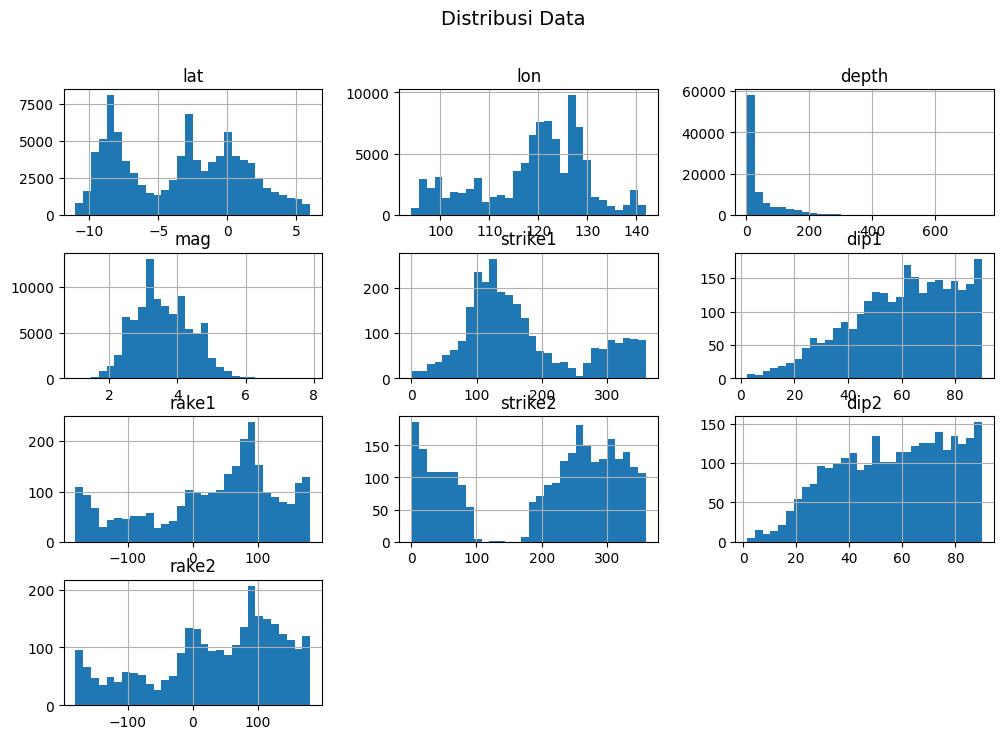

In [178]:
# Menampilkan distribusi data untuk setiap fitur numerik
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Data", fontsize=14)
plt.show()

In [179]:
# Jumlah data tiap remark / wilayah
print(df['remark'].value_counts())

remark
Minahassa Peninsula - Sulawesi        9433
Sulawesi - Indonesia                  7897
Sumbawa Region - Indonesia            7312
Java - Indonesia                      6798
Northern Sumatra - Indonesia          5941
Southern Sumatra - Indonesia          5314
Banda Sea                             5003
Northern Molucca Sea                  4984
Seram - Indonesia                     4325
Halmahera - Indonesia                 3628
Irian Jaya Region - Indonesia         3137
South of Java - Indonesia             2503
Talaud Islands - Indonesia            2427
Flores Region - Indonesia             2338
Timor Region                          1947
Flores Sea                            1879
Near North Coast of Irian Jaya        1865
Sumba Region - Indonesia              1851
Irian Jaya - Indonesia                1666
Ceram Sea                             1535
Bali Region - Indonesia               1374
Southern Molucca Sea                  1271
Sunda Strait - Indonesia              1063
Off 

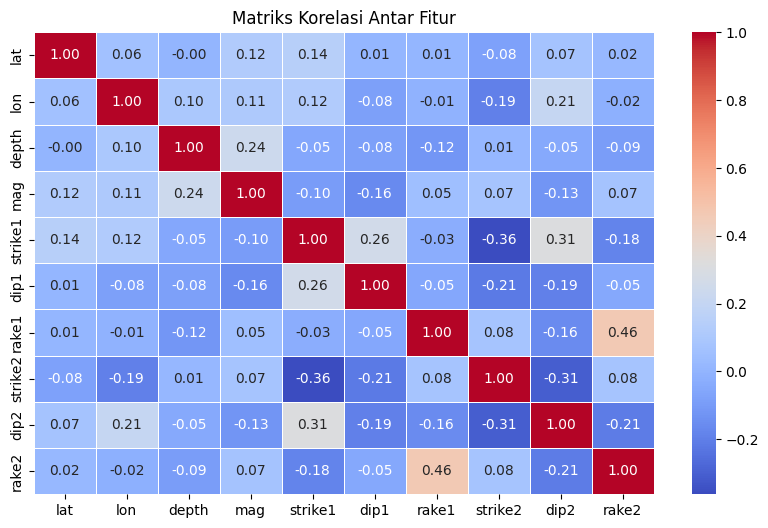

In [180]:
# Menampilkan korelasi antar fitur numerik dalam bentuk heatmap
plt.figure(figsize=(10, 6))

# Memilih hanya kolom numerik sebelum menghitung korelasi
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriks Korelasi Antar Fitur")
plt.show()

### Insight yang ditemukan
Dari data understanding di atas, kita dapat mengetahui bahwa dataset memiliki 10 kolom numerik dan 3 kolom string. Lalu kita juga dapat mengetahui bahwa kolom dip1, strike1, rake1, dip2, strike2, dan rake2 memiliki banyak sekali missing value (90152 dari 92887), yang berarti hanya 2735 data yang memiliki isi untuk kolom-kolom tersebut. Dari histogram distribusi data, kolom latitude dan longitude memiliki nilai yang beragam yang menandakan gempa terjadi di banyak tempat berbeda, banyak data dengan depth/kedalaman yang tidak terlalu dalam (mendekati 0 km), dan nilai magnitude hampir terdistribusi normal di sekitar rata-rata. Dati heatmap korelasi, kebanyakan fitur tidak terlalu berkorelasi satu dengan lainnya, hanya fitur rake1 dan rake 2 yang memiliki korelasi cukup tinggi yaitu 0.46.

## 4. Data Preparation

Pada langkah ini, akan dilakukan preprocessing yang dibutuhkan untuk menyesuaikan dataset yang dimiliki agar dapat digunakan sepenuhnya. Jika tujuan utama dari dataset ini adalah untuk **membuat model machine learning** seperti klasifikasi atau klastering. Maka kolom yang sangat kosong dapat mempengaruhi model, sehingga saran kami adalah membuat dataset menjadi 2 jenis, yaitu data lengkap yang memiliki semua kolom termasuk dip1, strike1, rake1, dip2, strike2, dan rake2 dengan nilai yang lengkap. Dan data yang tidak memiliki kolom-kolom tersebut. Namun jika hanya digunakan untuk visualisasi, maka missing value ini tidak terlalu berpengaruh karena hanya sebagai informasi tambahan.

In [181]:
df.tail()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,2023/01/26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,2023/01/26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,2023/01/26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92886,2023/01/26,00:00:35.181,-8.87,118.95,10,2.4,Sumbawa Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# Memisahkan tahun, bulan, dan tanggal
df[['tahun', 'bulan', 'tanggal']] = df['tgl'].str.split('/', expand=True)
df[['tahun', 'bulan', 'tanggal']] = df[['tahun', 'bulan', 'tanggal']].astype(int)

df.drop(columns=['tgl'], inplace=True)

df.tail()

,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,tahun,bulan,tanggal
92882,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92883,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92884,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92885,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92886,00:00:35.181,-8.87,118.95,10,2.4,Sumbawa Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26


In [183]:
# Mengubah kolom kategorikal remark menjadi numerik dengan Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['remark'] = le.fit_transform(df['remark'])

df.tail()

,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,tahun,bulan,tanggal
92882,02:25:09.288,3.24,127.18,10,4.0,46,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92883,02:15:03.893,2.70,127.10,10,3.9,27,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92884,01:57:08.885,-7.83,121.07,10,3.8,11,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92885,01:46:21.009,3.00,127.16,10,4.1,27,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26
92886,00:00:35.181,-8.87,118.95,10,2.4,44,NaN,NaN,NaN,NaN,NaN,NaN,2023,1,26


## Membagi dataframe menjadi dataframe lengkap, dataframe umum, dan dataframe khusus
- **Dataframe lengkap (df)** : Dataframe yang digunakan untuk analisi dan visualisasi, sehingga missing value dihiraukan karena dapat berguna untuk menambah informasi dari suatu data.
- **Dataframe umum (df1)** : Dataframe yang digunakan untuk machine learning yang memiliki data-data umum saja (tidak memiliki kolom dip1, strike1, rake1, dip2, strike2, and rake2). 
- **Dataframe khusus (df2)** : Dataframe yang digunakan untuk machine learning yang memiliki data-data khusus yang tidak terlalu banyak dimiliki oleh data umum biasanya.

### Dataframe lengkap (df)

In [184]:
df.head()

,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,tahun,bulan,tanggal
0,21:02:43.058,-9.18,119.06,10,4.9,43,NaN,NaN,NaN,NaN,NaN,NaN,2008,11,1
1,20:58:50.248,-6.55,129.64,10,4.6,4,NaN,NaN,NaN,NaN,NaN,NaN,2008,11,1
2,17:43:12.941,-7.01,106.63,121,3.7,15,NaN,NaN,NaN,NaN,NaN,NaN,2008,11,1
3,16:24:14.755,-3.30,127.85,10,3.2,32,NaN,NaN,NaN,NaN,NaN,NaN,2008,11,1
4,16:20:37.327,-6.41,129.54,70,4.3,4,NaN,NaN,NaN,NaN,NaN,NaN,2008,11,1


In [185]:
print(f"Jumlah Data: {len(df)}")
print(f"Jumlah Baris dengan Missing Value: {df.isnull().any(axis=1).sum()}")

Jumlah Data: 92887
Jumlah Baris dengan Missing Value: 90152


### Dataframe umum (df1)

In [186]:
# Drop kolom yang memiliki banyak missing value
df1 = df.drop(columns=['dip1', 'strike1', 'rake1', 'dip2', 'strike2', 'rake2'])

# Jika untuk membuat model clustering, maka fitur waktu tidak dibutuhkan
df1.drop(columns=['ot'], inplace=True)

df1.head()

,lat,lon,depth,mag,remark,tahun,bulan,tanggal
0,-9.18,119.06,10,4.9,43,2008,11,1
1,-6.55,129.64,10,4.6,4,2008,11,1
2,-7.01,106.63,121,3.7,15,2008,11,1
3,-3.30,127.85,10,3.2,32,2008,11,1
4,-6.41,129.54,70,4.3,4,2008,11,1


In [187]:
print(f"Jumlah Data: {len(df1)}")
print(f"Jumlah Baris dengan Missing Value: {df1.isnull().any(axis=1).sum()}")

Jumlah Data: 92887
Jumlah Baris dengan Missing Value: 0


### Dataframe khusus (df2)

In [188]:
# Drop baris dengan missing value
df2 = df.dropna().copy()

# Jika untuk membuat model clustering, maka fitur waktu tidak dibutuhkan
df2.drop(columns=['ot'], inplace=True)

df2.head()

,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,tahun,bulan,tanggal
8739,-9.28,122.46,139,5.7,31,343.7,43.0,-168.1,244.97,81.9,-47.6,2011,6,27
8801,4.37,97.52,10,3.4,28,197.1,40.0,-55.6,335.29,58.0,-115.4,2011,7,4
8804,1.45,96.95,13,4.8,29,333.8,75.6,-128.5,226.40,40.7,-22.4,2011,7,5
8910,-1.27,137.83,10,5.1,21,100.5,71.9,95.8,262.47,18.9,72.9,2011,7,19
9026,-3.11,130.92,10,4.8,32,110.9,16.3,-146.7,348.74,81.1,-76.2,2011,8,6


In [189]:
print(f"Jumlah Data: {len(df2)}")
print(f"Jumlah Baris dengan Missing Value: {df2.isnull().any(axis=1).sum()}")

Jumlah Data: 2735
Jumlah Baris dengan Missing Value: 0


### Alasan pemisahan dataframe:
Dalam preprocessing, tiga dataframe dibuat untuk tujuan analisis dan machine learning. Dataframe lengkap (df) tetap dipertahankan tanpa menghapus missing value agar informasi yang mungkin berguna tetap tersedia untuk analisis eksploratif dan visualisasi. Dataframe umum (df1) dibuat dengan menghapus kolom dip1, strike1, rake1, dip2, strike2, dan rake2 karena kolom-kolom ini memiliki banyak missing value (lebih dari 97.7% total dataset). Sementara itu, dataframe khusus (df2) hanya menyimpan baris yang memiliki nilai fitur lengkap pada kolom tersebut, sehingga dataset ini lebih cocok untuk model yang membutuhkan informasi seismik spesifik. Pemisahan ini dilakukan untuk memastikan fleksibilitas dalam analisis dan pemodelan, sehingga setiap dataset dapat digunakan sesuai dengan kebutuhan tanpa mengorbankan informasi penting.